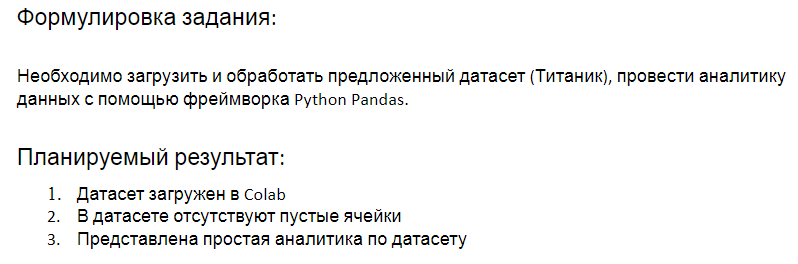

In [ ]:
import pandas as pd # подключаем библиотеку Pandas
import matplotlib.pyplot as plt # подключаем библиотеку MatPlotLib
import numpy as np # подключаем библиотеку NumPy

In [ ]:
titanic = pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv', delimiter=',') # Читаем датасет Titanic-Dataset.csv с Google диска

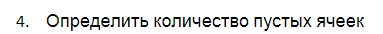

In [ ]:
# Определяем количество пустых ячеек по столбцам (признакам)
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Определяем общее количество пустых ячеек
number_of_empty_cells = titanic.isnull().sum().sum()
print("Количество пустых ячеек:", number_of_empty_cells)

Количество пустых ячеек: 866


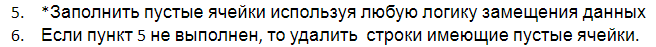

In [ ]:
# Заменяем пустые значения в столбце Age (возраст)
Average_age = round(titanic['Age'].mean()) # считаем среднее арифметическое значение по столбцу Age (возраст) и округляем значение до целого
titanic['Age'].fillna(Average_age, inplace = True) # Заменяем пустые значения округленным средним арифметическим

In [ ]:
# Предположим, что значения столбца Cabin (номер каюты) не потребуются нам для анализа
titanic.drop(columns = 'Cabin', axis = 1, inplace = True) # Удаляем столбец Cabin (номер каюты)

In [ ]:
# Удаляем все оставшиеся строки с пустыми ячейками из датасета
titanic.dropna(inplace = True) # Удаляем все строки с пустыми ячейками из датасета (2 пустые ячейки - в столбце Embarked (порт посадки))

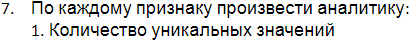

In [ ]:
# Считаем количество уникальных значений по признакам (столбцам)
unique_values = titanic.nunique ()
print (unique_values)

PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         680
Fare           247
Embarked         3
dtype: int64


image.png

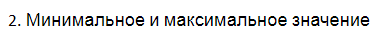

In [ ]:
# Выводим минимальные значения по признакам (столбцам)
min_column = titanic.min()
print(min_column)

PassengerId                      1
Survived                         0
Pclass                           1
Name           Abbing, Mr. Anthony
Sex                         female
Age                           0.42
SibSp                            0
Parch                            0
Ticket                      110152
Fare                           0.0
Embarked                         C
dtype: object


In [ ]:
# Выводим максимальные значения по признакам (столбцам)
max_column = titanic.max()
print(max_column)

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                   80.0
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                              512.3292
Embarked                                 S
dtype: object


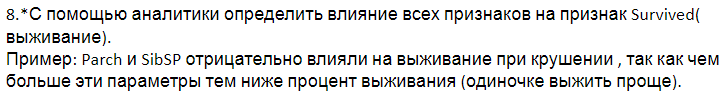

In [ ]:
def calculate_percentage_survivors(number_total, number_survivors):
  '''Функция считает процен выживших и возвращает статистику'''
  percentage_survivors = round((number_survivors / number_total * 100), 2) # Считаем процент выживших и округляем до 2-го знака после запятой
  return number_total, number_survivors, percentage_survivors
  #print(f'''Всего: {number_total}
#Выжило: {number_survivors}
#Процент выживших: {percentage_survivors}%''')

In [ ]:
def calculate_quantity(column_name, value):
  '''Функция считает общее количество, колличество выживших пасажиров с определённым признаком и процент выживших использую функцию calculate_percentage_survivors()'''
  total = len(titanic[titanic[column_name]==value]) # Считаем общее количество
  survivor = len(titanic[(titanic['Survived']==1) &(titanic[column_name]==value)]) # Считаем количество выживших
  percentage_survivors = calculate_percentage_survivors(total, survivor) # Считаем процент выживших
  return percentage_survivors

In [ ]:
def print_survivors(input_function):
  '''Функция выводит на экран общее количество, колличество выживших пасажиров и процен выживших'''
  print(f'''Всего: {input_function[0]}
Выжило: {input_function[1]}
Процент выживших: {input_function[2]}%''')

In [ ]:
calculate_quantity('Sex', 'male') # Считаем процент выживших мужчин
print_survivors(calculate_quantity('Sex', 'male'))

Всего: 577
Выжило: 109
Процент выживших: 18.89%


In [ ]:
calculate_quantity('Sex', 'female') # Считаем процент выживших женщин
print_survivors(calculate_quantity('Sex', 'female'))

Всего: 312
Выжило: 231
Процент выживших: 74.04%


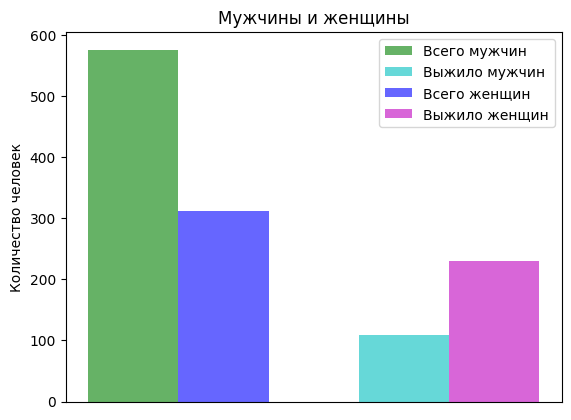

In [ ]:
x1 = [1, 2.5]
x2 = [1.5, 3]
y1 = calculate_quantity('Sex', 'male')[0:2]
y2 = calculate_quantity('Sex', 'female')[0:2]
plt.bar(x1, y1, label=['Всего мужчин','Выжило мужчин'], width = 0.5, color=["g", "c"], alpha=0.6)
plt.bar(x2, y2, label=['Всего женщин','Выжило женщин'], width = 0.5, color=["b", "m"], alpha=0.6)
plt.ylabel('Количество человек')
plt.title('Мужчины и женщины')
plt.xticks([])
plt.legend()
plt.show()

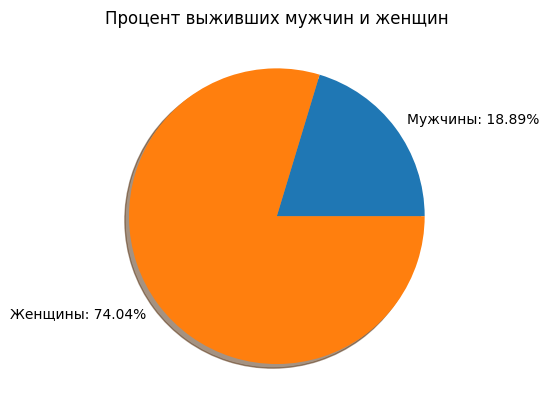

In [ ]:
vals = [calculate_quantity('Sex', 'male')[2], calculate_quantity('Sex', 'female')[2]]
labels = [f'''Мужчины: {calculate_quantity('Sex', 'male')[2]}%''', f'''Женщины: {calculate_quantity('Sex', 'female')[2]}%''']
plt.pie(vals, labels=labels, shadow=True)
plt.title('Процент выживших мужчин и женщин')
plt.show()

**Вывод: у мужчин шанс выжить более чем на 50 процентов меньше чем у женщин.**

In [ ]:
c = calculate_quantity('Pclass', 1) # Считаем процент выживших пассажиров 1-го класса
print_survivors(calculate_quantity('Pclass', 1))

Всего: 214
Выжило: 134
Процент выживших: 62.62%


In [ ]:
calculate_quantity('Pclass', 2) # Считаем процент выживших пассажиров 2-го класса
print_survivors(calculate_quantity('Pclass', 2))

Всего: 184
Выжило: 87
Процент выживших: 47.28%


In [ ]:
calculate_quantity('Pclass', 3) # Считаем процент выживших пассажиров 3-го класса
print_survivors(calculate_quantity('Pclass', 3))

Всего: 491
Выжило: 119
Процент выживших: 24.24%


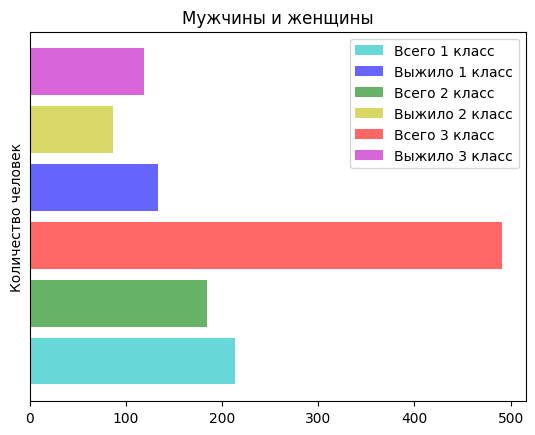

In [ ]:
x1 = [1, 4]
x2 = [2, 5]
x3 = [3, 6]
y1 = calculate_quantity('Pclass', 1)[0:2]
y2 = calculate_quantity('Pclass', 2)[0:2]
y3 = calculate_quantity('Pclass', 3)[0:2]
plt.barh(x1, y1, label=['Всего 1 класс','Выжило 1 класс'], color=["c", "b"], alpha=0.6)
plt.barh(x2, y2, label=['Всего 2 класс','Выжило 2 класс'], color=["g", "y"], alpha=0.6)
plt.barh(x3, y3, label=['Всего 3 класс','Выжило 3 класс'], color=["r", "m"], alpha=0.6)
plt.ylabel('Количество человек')
plt.title('Мужчины и женщины')
plt.yticks([])
plt.legend()
plt.show()

**Вывод: чем выше класс круиза тем больше шансов выжить.**

In [ ]:
calculate_quantity('Embarked', 'C') # Считаем процент выживших пассажиров, совершивших посадку в порту "C"
print_survivors(calculate_quantity('Embarked', 'C'))

Всего: 168
Выжило: 93
Процент выживших: 55.36%


In [ ]:
calculate_quantity('Embarked', 'Q') # Считаем процент выживших пассажиров, совершивших посадку в порту "Q"
print_survivors(calculate_quantity('Embarked', 'Q'))

Всего: 77
Выжило: 30
Процент выживших: 38.96%


In [ ]:
calculate_quantity('Embarked', 'S') # Считаем процент выживших пассажиров, совершивших посадку в порту "S"
print_survivors(calculate_quantity('Embarked', 'S'))

Всего: 644
Выжило: 217
Процент выживших: 33.7%


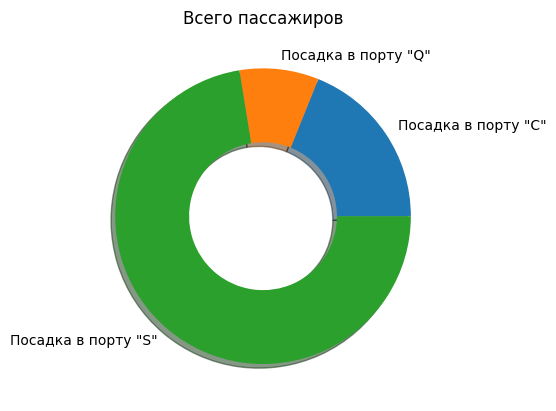

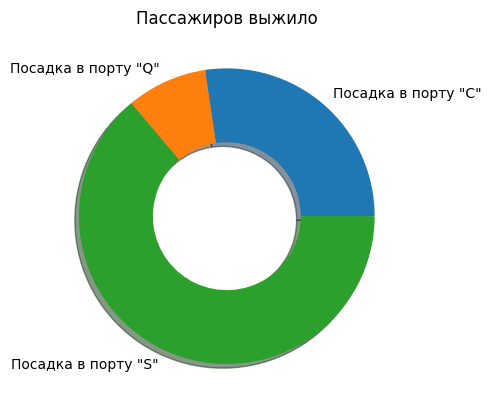

In [ ]:
vals = [calculate_quantity('Embarked', 'C')[0], calculate_quantity('Embarked', 'Q')[0], calculate_quantity('Embarked', 'S')[0]]
plt.pie(vals, labels=['Посадка в порту "C"', 'Посадка в порту "Q"', 'Посадка в порту "S"'], shadow=True, wedgeprops=dict(width=0.5))
plt.title('Всего пассажиров')
plt.show()

vals = [calculate_quantity('Embarked', 'C')[1], calculate_quantity('Embarked', 'Q')[1], calculate_quantity('Embarked', 'S')[1]]
plt.pie(vals, labels=['Посадка в порту "C"', 'Посадка в порту "Q"', 'Посадка в порту "S"'], shadow=True, wedgeprops=dict(width=0.5))
plt.title('Пассажиров выжило')
plt.show()

**Вывод: лучше совершать посадку в порту "C"**